In [1]:
from pytriqs.gf import *
import numpy as np

a = 5
beta = 500.0
n_iw = 2000
iw_mesh = MeshImFreq(beta, 'Fermion', n_iw)

g = Gf(mesh=iw_mesh, target_shape=[2,2])
g  << 0.5*(inverse(iOmega_n - a) + inverse(iOmega_n + 2*a))

omax = (2*n_iw + 1)*3.1416/beta/(2*a)
print "omax", omax

omax 2.51390832


/usr/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/Users/oparcollet/triqs_install/lib/python2.7/site-packages/pytriqs/gf/plot/plot_base.py:44: UserWarning: oplot of gf : no name provided !
  warn("oplot of gf : no name provided !")


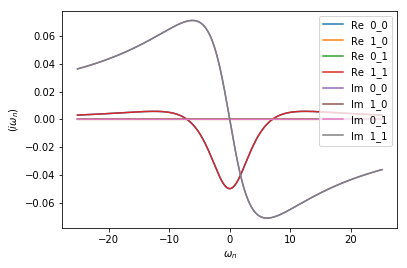

In [2]:
from pytriqs.plot.mpl_interface import *
%matplotlib inline
oplot(g)

In [3]:
def eval_tail(g):
    mytail, err  = g.get_tail()
    def f(omega):
        z = 1.
        res = np.zeros(mytail.shape[1:], dtype='complex128')
        for n in range(mytail.shape[0]):
            res[:] += mytail[n,:] * z
            z = z / omega
        return res
    return f

In [4]:
print g.get_tail()[1]

2.57265326266e-07


<function matplotlib.pyplot.show>

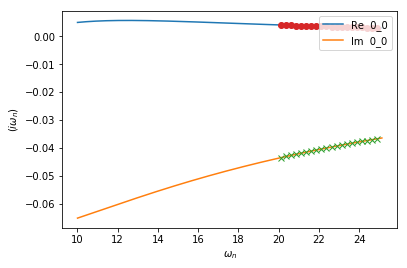

In [5]:
g_tail = eval_tail(g)

x_points = np.array([x.value for x in g.mesh][ -int(n_iw *(0.2)):-1:20])
y_points = np.array([g_tail(x,)[0,0] for x in x_points])

#print x_points
#print y_points 
oplot(g[0,0], x_window=(10,50))
plt.plot(x_points.imag, y_points.imag, 'x')
plt.plot(x_points.imag, y_points.real, 'o')
plt.show

In [6]:
def analy(n):
    return 0.5*((a)**(n-1) + (-2*a)**(n-1))
for n,x in enumerate(g.get_tail()[0][:,0,0].real):
    print x/(analy(n))

0.0007526461487328273
0.9996119472015511
0.9680007540303558
0.9868507413583621
0.8502361336837594
0.8738141357928885
0.46893501555181627
0.48420387022022277


In [7]:
def f(Nw) :
    iw_mesh = MeshImFreq(beta, 'Fermion', Nw)
    g = Gf(mesh=iw_mesh, target_shape=[2,2])
    g  << 0.5*(inverse(iOmega_n - a) + inverse(iOmega_n + 2*a))
    return g.get_tail()[0][:,0,0].real 

In [8]:
%%timeit
f(5000)

1 loop, best of 3: 1.58 s per loop


In [9]:
X = np.arange(1000, 10000, 500)

X = np.arange(1000, 6000, 500)

Xp = [((2*n + 1)*3.1416/beta)/(2*a) for n in X]

d = [f(x) for x in X]
def f2(n):
    return [dd[n]/analy(n) for dd in d]

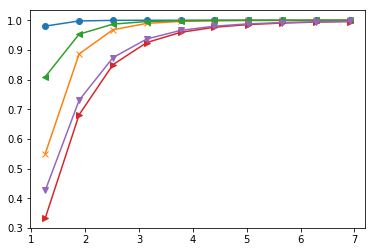

In [10]:
plt.plot(Xp, f2(1), '-o')
plt.plot(Xp, f2(2), '-x')
plt.plot(Xp, f2(3), '-<')
plt.plot(Xp, f2(4), '->')
plt.plot(Xp, f2(5), '-v')
#plt.plot(Xp, f2(6), '-*')

In [11]:
zip(Xp,f2(2))

[(1.25726832, 0.5503778818492906),
 (1.88558832, 0.8863622885422962),
 (2.51390832, 0.9680007540303558),
 (3.14222832, 0.989398716456891),
 (3.7705483200000005, 0.9959408275347414),
 (4.39886832, 0.9982504901777025),
 (5.02718832, 0.9991703509145109),
 (5.65550832, 0.9995747913056189),
 (6.28382832, 0.9997676952750156),
 (6.91214832, 0.9998661428496689)]

In [12]:
delta = g.copy()
for w in g.mesh:
    #print g[w]
    delta[w] = w - 1/g[w][0,0]

In [13]:
t, err = delta.get_tail()
t = t[0,0,0].real
print abs(t - delta.tail[2][0,0])

km = np.zeros((2,2,2)) * 1j #, dtype = np.dcomplex64)
km[1,:] = np.eye(2,2)
t2, err2 = g.get_tail(km)
t2 = t2[2,0,0].real
print abs(t2 - g.tail[2][0,0])



5.200145238859477e-07
0.0038824300465254424
